# R을 이용한 퀀트 투자 포트폴리오 만들기 (이현열, 제이펍)
## Chapter 1 퀀트 투자의 심장: 데이터와 프로그래밍

* 일반적으로 투자자들이 산업과 기업을 분석해 가치를 매기는 정성적인 투자법과는 달리, 퀀트 투자는 수학과 통계를 기반으로 전략을 만들고 이를 바탕으로 투자하는 정량적인 투자법이다.
* 데이터 과학 업무 과정 : 
   import -> tidy -> (transfor -> visaulize -> model) -> communicate
* 투자에 필요한 주가, 재무제표 등의 데이터를 수집해 정리한 후 필요한 지표를 얻기 위해 가공한다. 그 후 각종 모형을 이용해 투자 종목을 선택하거나 백테스트를 수행하며, 이를 바탕으로 실제로 투자하고 성과를 평가한다.

### 1.1 데이터 구하기
* 유료 데이터 : 블룸버그, Factset, DataGuide(국내), Quandi, tiingo 등
* 위 서비스들에서 한국 시장 정보는 소외되어 있다. 야후 파이낸스 혹은 국내 금용 웹사이트를 크롤링해 비용 없이 데이터를 수집할 수 있다. 다만 클렌징 작업이 필요하고, 상장폐지 기업의 정보는 얻기 힘들다.

### 1.2 퀀트 투자와 프로그래밍
* 데이터를 목적에 맞게 처리하는 데이터 클렌징 작업과, 투자 전략의 백테스트나 종목 선정을 위해 프로그래밍은 필수

### 1.3 퀀트 투자에 유용한 R 패키지
* **quantmod** : API를 이용해 데이터를 다운로드하는 `getSymbols()` 함수 외에도, 볼린저밴드, 이동평균선, 상대강도지수(RSI) 등 여러 기술적 지표를 주가 차트에 나타낼 수 있다.
* **PerformanceAnalytics** : 포트폴리오의 성과와 위험 측정에 유용. `Return.portfolio()` 함수는 포트폴리오 백테스트에 필수적
* **xts** : 금융 데이터를 시계열 형태(eXtensible TimeSeries)로 변형해주는 데 용이. 일별 수익률을 월별 수익률 혹은 연도별 수익률로 변환하는 `apply.monthly()`와 `apply.yearly()` 함수, 데이터들의 특정 시점을 찾아주는 `endpoints()` 함수 역시 백테스트에 필수적으로 사용. (PerformanceAnalytics 설치 시 자동으로 설치됨)
* **zoo** : 시계열 데이터 처리에 유용. `rollapply()` 함수는 `apply()` 함수를 전체 데이터가 아닌 롤링 윈도우 기법으로 활용할 수 있게 해주며, NA 데이터를 채워주는 `na.locf()` 함수는 시계열 데이터의 결측치 보정에 유용.
* **httr & rvest** : 웹 크롤링 패키지. httr은 http의 표준 요청을 수행하며, 단순히 데이터를 받는 `GET()`과 필요한 값을 선택해 요청할 수 있는 `POST()` 함수가 대표적. rvest는 HTML 문서의 데이터를 가져오는 패키지.
* **dplyr** : 데이터 처리에 특화. C++로 작성되어 매우 빠른 처리 속도가 장점. API나 크롤링을 통해 수집한 데이터를 정리할 때 매우 유용.
* **ggplot2** : 데이터 시각화 패키지.


### 본 파일은 학습 내용 정리용이며, 코딩 작업에는 R Studio 사용을 권장합니다.


In [2]:
# 패키지 설치
pkg = c('magrittr', 'quantmod', 'rvest', 'httr', 'jsonlite',
        'readr', 'readxl', 'stringr', 'lubridate', 'dplyr',
        'tidyr', 'ggplot2', 'corrplot', 'dygraphs',
        'highcharter', 'plotly', 'PerformanceAnalytics',
        'nloptr', 'quadprog', 'RiskPortfolios', 'cccp',
        'timetk', 'broom', 'stargazer', 'timeSeries')

new.pkg = pkg[!(pkg %in% installed.packages()[, "Package"])]
if (length(new.pkg)) {
  install.packages(new.pkg, dependencies = TRUE)}

## Chapter 2 크롤링을 위한 기본 지식
https://hyunyulhenry.github.io/quant_cookbook/%ED%81%AC%EB%A1%A4%EB%A7%81%EC%9D%84-%EC%9C%84%ED%95%9C-%EA%B8%B0%EB%B3%B8-%EC%A7%80%EC%8B%9D.html

## Chapter 3 API를 이용한 데이터 수집
### 3.1 API를 이용한 Quandl 데이터 다운로드
- 애플 주가 csv 다운로드해보기
csv 형식의 API 주소 : https://www.quandl.com/api/v3/datasets/WIKI/AAPL/data.csv?api_key=xw3NU3xLUZ7vZgrz5QnG

In [3]:
url.aapl = "https://www.quandl.com/api/v3/datasets/WIKI/AAPL/data.csv?api_key=xw3NU3xLUZ7vZgrz5QnG"
data.aapl = read.csv(url.aapl)

head(data.aapl)

,Date,Open,High,Low,Close,Volume,Ex.Dividend,Split.Ratio,Adj..Open,Adj..High,Adj..Low,Adj..Close,Adj..Volume
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-03-27,173.68,175.15,166.92,168.340,38962839,0,1,173.68,175.15,166.92,168.340,38962839
2,2018-03-26,168.07,173.10,166.44,172.770,36272617,0,1,168.07,173.10,166.44,172.770,36272617
3,2018-03-23,168.39,169.92,164.94,164.940,40248954,0,1,168.39,169.92,164.94,164.940,40248954
4,2018-03-22,170.00,172.68,168.60,168.845,41051076,0,1,170.00,172.68,168.60,168.845,41051076
5,2018-03-21,175.04,175.09,171.26,171.270,35247358,0,1,175.04,175.09,171.26,171.270,35247358
6,2018-03-20,175.24,176.80,174.94,175.240,19314039,0,1,175.24,176.80,174.94,175.240,19314039


### 3.2 `getSymbols()` 함수를 이용한 API 다운로드
**3.2.1 주가 다운로드 (애플)
- `getSymbols()` : 괄호 안에 다운로드하려는 종목의 티커를 입력한다.

In [12]:
# 주가 다운로드
library(quantmod)
getSymbols('AAPL')

[1] "AAPL"

In [6]:
# 티커와 동일한 '변수' AAPL이 생성되며, 주가 데이터가 다운로드 된 후 xts 형태로 입력된다.
head(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2007-01-03  3.081786  3.092143 2.925000   2.992857  1238319600      2.573566
2007-01-04  3.001786  3.069643 2.993571   3.059286   847260400      2.630688
2007-01-05  3.063214  3.078571 3.014286   3.037500   834741600      2.611954
2007-01-08  3.070000  3.090357 3.045714   3.052500   797106800      2.624853
2007-01-09  3.087500  3.320714 3.041071   3.306071  3349298400      2.842900
2007-01-10  3.383929  3.492857 3.337500   3.464286  2952880000      2.978950

Open : 시가 / High : 고가 / Low : 저가 / Close : 종가
Volume : 거래량 / Adjusted : 배당이 반영된 수정주가

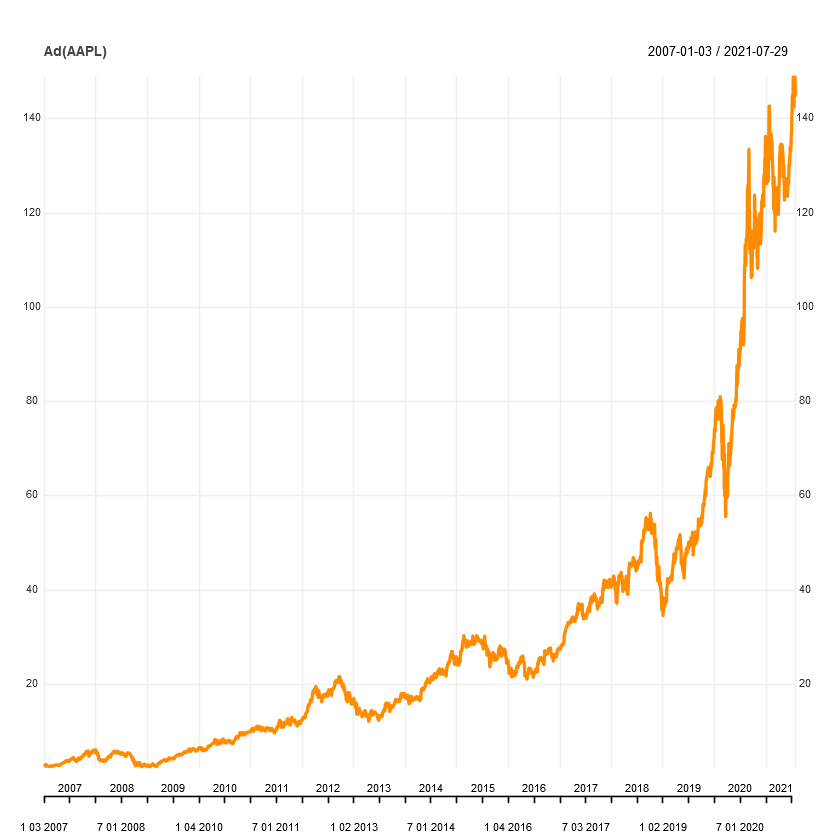

In [9]:
# 수정주가만 선택한 후 시계열 그래프 그리기
chart_Series(Ad(AAPL))

In [18]:
data = getSymbols('AAPL',
                  from = '2000-01-01', to = '2018-12-31',
                  auto.assign = FALSE) 
head(data)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2000-01-03  0.936384  1.004464 0.907924   0.999442   535796800      0.859423
2000-01-04  0.966518  0.987723 0.903460   0.915179   512377600      0.786965
2000-01-05  0.926339  0.987165 0.919643   0.928571   778321600      0.798481
2000-01-06  0.947545  0.955357 0.848214   0.848214   767972800      0.729382
2000-01-07  0.861607  0.901786 0.852679   0.888393   460734400      0.763932
2000-01-10  0.910714  0.912946 0.845982   0.872768   505064000      0.750496

In [20]:
# 티커명이 아닌 원하는 변수명(이 경우 data)에 데이터를 저장하려면, 
# auto.assign = FALSE로 지정해야 함
ticker = c('FB', 'NVDA')
getSymbols(ticker)
head(FB)
head(NVDA)

[1] "FB"   "NVDA"

           FB.Open FB.High FB.Low FB.Close FB.Volume FB.Adjusted
2012-05-18   42.05   45.00  38.00    38.23 573576400       38.23
2012-05-21   36.53   36.66  33.00    34.03 168192700       34.03
2012-05-22   32.61   33.59  30.94    31.00 101786600       31.00
2012-05-23   31.37   32.50  31.36    32.00  73600000       32.00
2012-05-24   32.95   33.21  31.77    33.03  50237200       33.03
2012-05-25   32.90   32.95  31.11    31.91  37149800       31.91

           NVDA.Open NVDA.High NVDA.Low NVDA.Close NVDA.Volume NVDA.Adjusted
2007-01-03  6.178333  6.253333 5.798333   6.013333   115482000      5.525562
2007-01-04  5.991667  6.013333 5.838333   5.985000    79729800      5.499525
2007-01-05  5.843333  5.866667 5.570000   5.610000   124334400      5.154944
2007-01-08  5.630000  5.760000 5.533333   5.651667    65727000      5.193231
2007-01-09  5.660000  5.698333 5.535000   5.541667    76416600      5.092154
2007-01-10  5.483333  5.866667 5.400000   5.815000   110874600      5.343316

**3.2.2 국내 종목 주가 다운로드**
- 국내 종목의 티커는 총 6자리로 구성
- 코스피 : 티커.KS / 코스닥 : 티커.KQ 형태로 입력한다.

In [26]:
getSymbols('005930.KS',
          from = '2000-01-01', to = Sys.Date())

Warning message:
"005930.KS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."


[1] "005930.KS"

In [28]:
tail(Ad(`005930.KS`)) # 변수명 안에 마침표(.)가 있으므로, 억음 부호(`) 추가

           005930.KS.Adjusted
2021-07-22              79700
2021-07-23              79300
2021-07-26              78800
2021-07-27              78500
2021-07-28              79200
2021-07-29              79000

In [29]:
tail(Cl(`005930.KS`)) # 종가 조회

           005930.KS.Close
2021-07-22           79700
2021-07-23           79300
2021-07-26           78800
2021-07-27           78500
2021-07-28           79200
2021-07-29           79000

In [30]:
# 셀트리온 조회 (코스닥)
getSymbols('068760.KQ',
          from = '2000-01-01', to = Sys.Date())

Warning message:
"068760.KQ contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."


[1] "068760.KQ"

In [31]:
tail(Cl(`068760.KQ`))

           068760.KQ.Close
2021-07-22              NA
2021-07-23              NA
2021-07-26              NA
2021-07-27              NA
2021-07-28              NA
2021-07-29          143600

**3.2.3 FRED 데이터 다운로드**
- Federal Reserve Economic Data : 미국 연방준비은행에서 관리하는 미국 및 각국의 중요 경제지표 데이터.
- 각 항목별 티커를 찾는 방법 : FRED 웹사이트(https://fred.stlouisfed.org/)에서 원하는 데이터 검색. url의 마지막 코드 참조 

In [32]:
# 미 국채 10년물 금리 다운로드하기
getSymbols('DGS10', src='FRED')

[1] "DGS10"

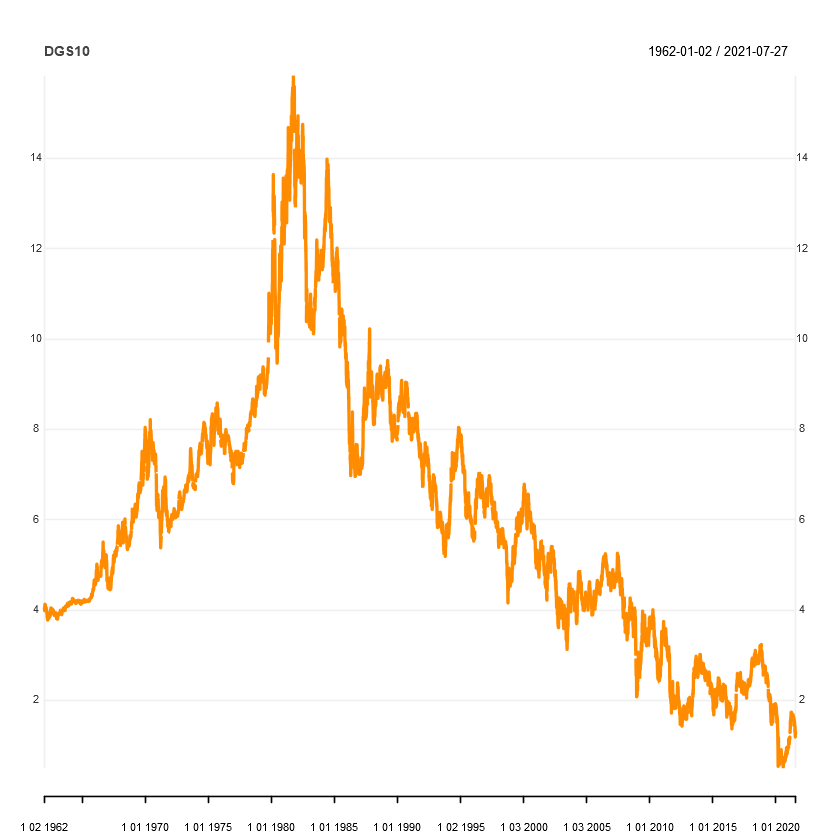

In [34]:
chart_Series(DGS10)

In [36]:
# Consumer Price Index for All Urban Consumers:
# : All Items Less Food and Energy in U.S. City Average (CPILFESL)
getSymbols('CPILFESL', src='FRED')
tail(CPILFESL)

[1] "CPILFESL"

           CPILFESL
2021-01-01  270.025
2021-02-01  270.299
2021-03-01  271.214
2021-04-01  273.700
2021-05-01  275.718
2021-06-01  278.140